In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score

In [2]:
#step1.資料載入與檢視
#讀取csv檔
#( ./Data/result.csv',sep=',')代表下層Data文件夾中 sep 表以''內的區隔
# (../)代表上層目錄
#os.path.join()函数：連接兩個或更多的路徑名组件
#os.getcwd() 當前路徑
#當前目錄就是這個python文件在的目錄

train = pd.read_csv('train.csv', header=None)
trainlable = pd.read_csv('trainLabels.csv', header=None)
test = pd.read_csv('test.csv', header=None)

In [3]:
print('train shape:', train.shape,'test shape:', test.shape,'trainLabel shape:', trainlable.shape)


train shape: (1000, 40) test shape: (9000, 40) trainLabel shape: (1000, 1)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null float64
31    1000 non-null float6

In [5]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [6]:
train.dtypes.value_counts()

float64    40
dtype: int64

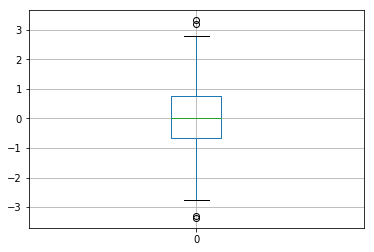

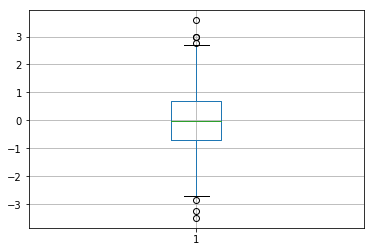

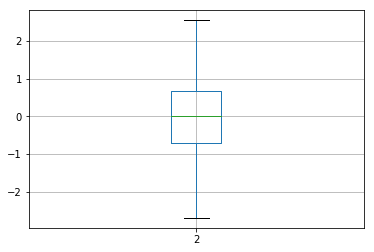

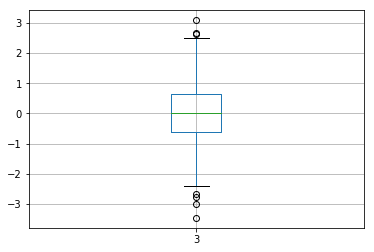

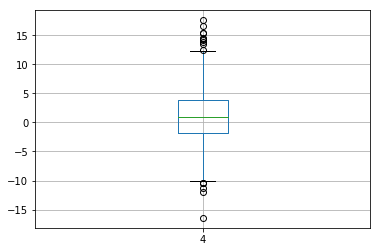

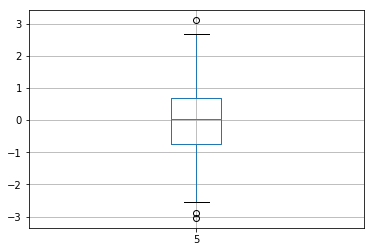

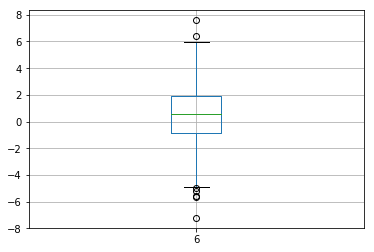

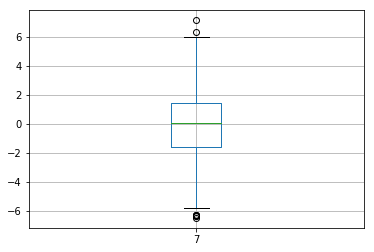

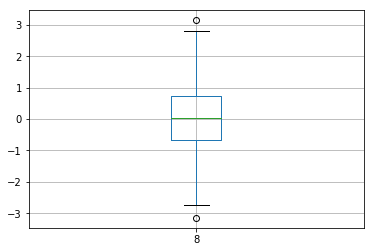

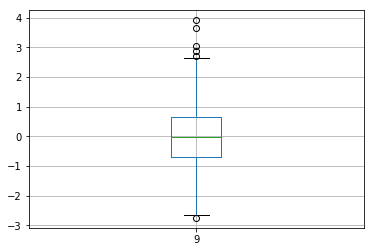

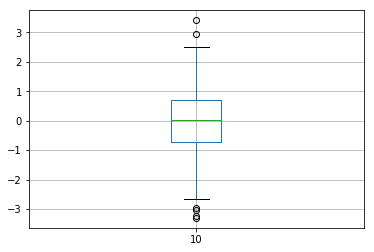

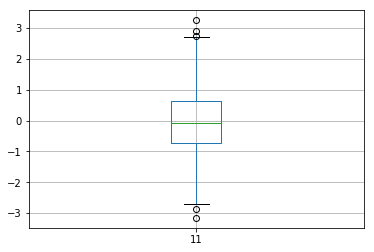

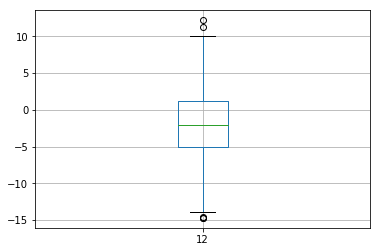

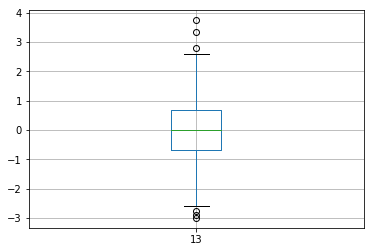

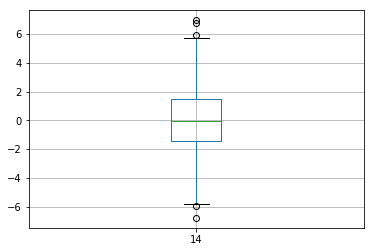

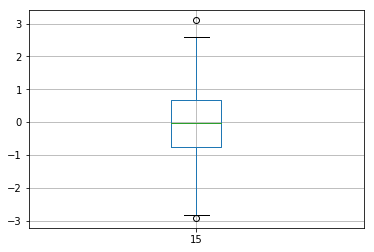

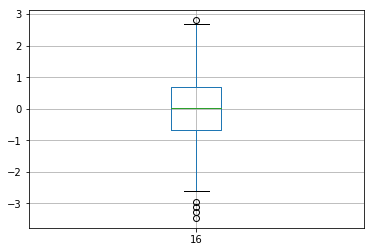

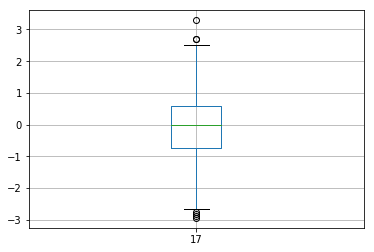

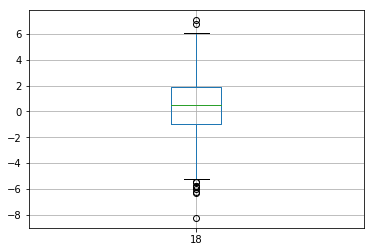

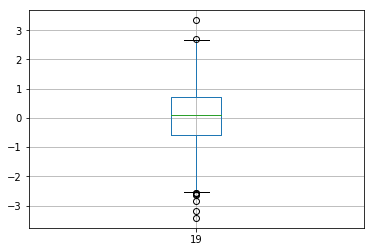

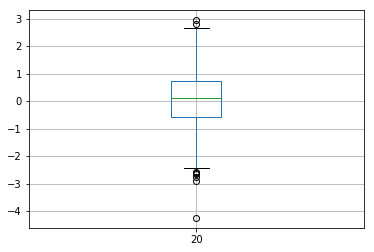

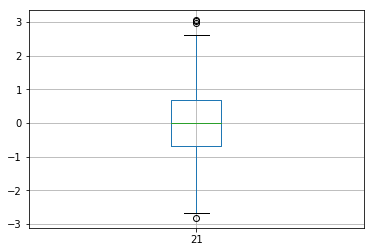

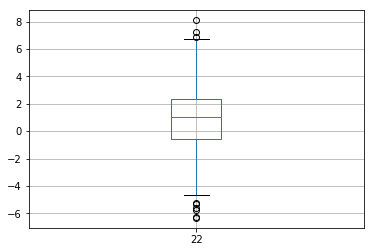

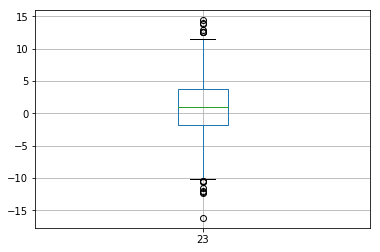

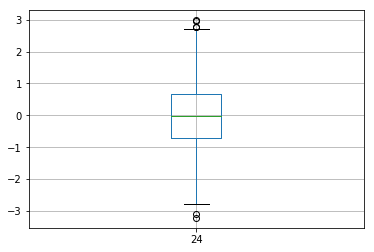

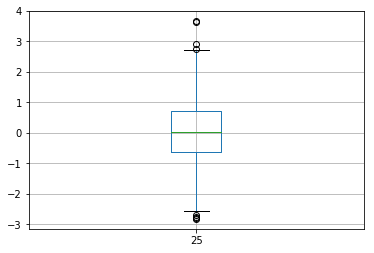

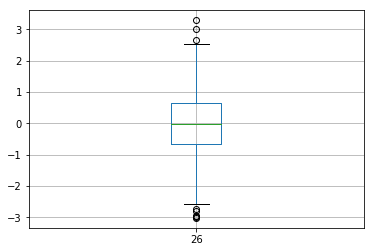

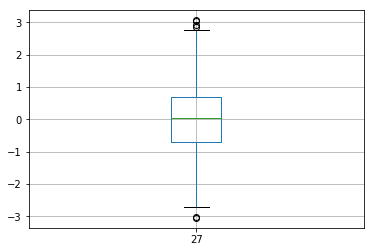

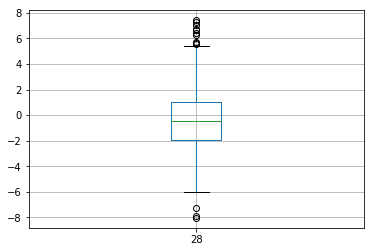

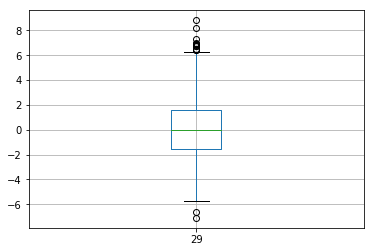

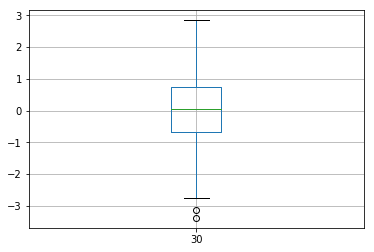

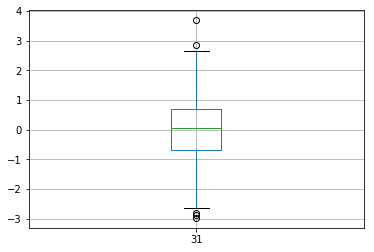

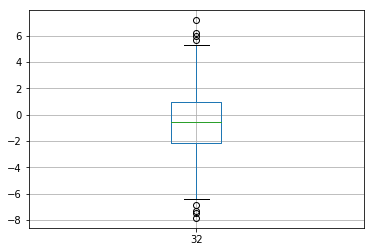

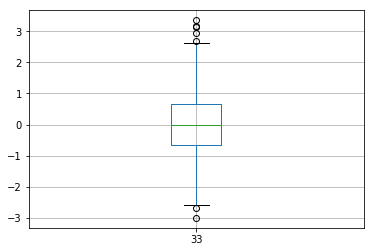

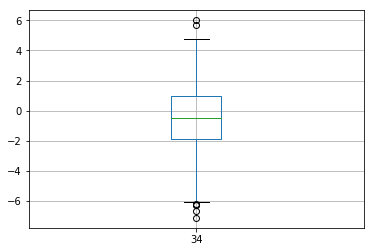

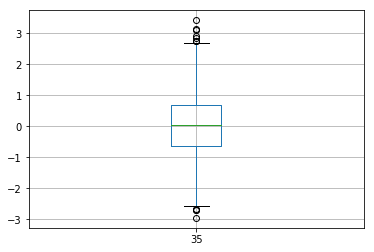

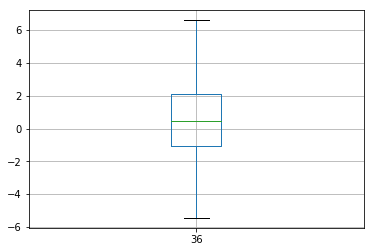

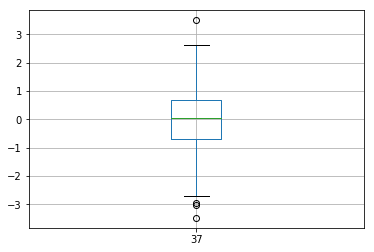

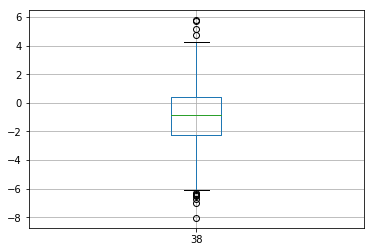

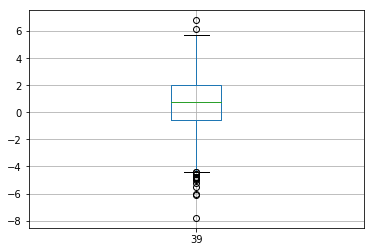

In [7]:
#step2.資料探索(Exploratory Data Analysis, EDA)：視覺化分析
# 檢視這些欄位的數值範圍
import matplotlib.pyplot as plt
%matplotlib inline

#選擇資料型態放入
dtype_select = ['float64']
numeric_columns = list(train.select_dtypes(include=dtype_select))

#視覺化預測變數與目標變數間的關係：相關係數矩陣、散佈圖scatter plot
#檢查預測變數分佈是否為常態分佈(鐘型)而沒有左右偏移：機率密度圖density plot

for col in numeric_columns:
    train.boxplot(col)  #train[[col]].boxplot()  劃出欄位的盒須圖(找出極端值)
    plt.show()

In [8]:
#step3. 資料預處理

#極端值/異常值處理 (補值/不用/另開欄位)

#標準化/最大最小化(特徵縮放)-使變數間關係衡量不受單位規模數值影響

#變數轉換-使變數接近常態分佈，以符合模型假設

#確認遺漏(原因、類型)並進行遺漏值(1.填補)-統計值/指定值/預測值 (2.刪除) (3.不處理)-直接進入模型

In [58]:
#step4.選擇模型
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler 
from sklearn.tree import DecisionTreeClassifier
#因為最大最小化對極端數值較敏感，所以如果資料不會有極端值，或已經去極端值，就適合用最大最⼩小化，否則用標準化

x_train,x_test,y_train,y_test = train_test_split(train,trainlable, test_size = 0.25, random_state = 42)

normalizer = MinMaxScaler()
x_train_nor=normalizer.fit_transform(x_train)
x_test_nor=normalizer.fit_transform(x_test)


model_clf =RandomForestClassifier(n_estimators=1)
model_clf.fit(x_train,y_train.values.ravel())
y_pred = model_clf.predict(x_test)
rfc = accuracy_score(y_pred, y_test)
print('rfc : %.5f'%rfc)


rfc : 0.72800


In [59]:
model_rfc =LogisticRegression(solver = 'saga')
model_rfc.fit(x_train,y_train.values.ravel())
y_pred = model_rfc.predict(x_test)
lr = accuracy_score(y_pred, y_test)
print("lr : %.5f"%lr)


lr : 0.81600


In [60]:
model_dtc = DecisionTreeClassifier(random_state=1)
model_dtc.fit(x_train,y_train.values.ravel())
y_pred= model_dtc.predict(x_test)
dtc = accuracy_score(y_pred, y_test)
print('dt:%f'%dtc)


dt:0.724000


In [62]:
#step5.選擇隨機森林調整參數，並再次預測

#查詢內含超參數
from pprint import pprint
print('Parameters currently in use:\n')
pprint(model_clf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [64]:
from sklearn.model_selection import  GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 10)] #np.linspace 在指定的间隔内返回均匀間隔的数字。

max_depth = [int(x) for x in np.linspace(10, 150, num = 11)]
max_depth.append(None)

min_samples_leaf = [1, 2, 4]

param_grid = dict(n_estimators=n_estimators, max_depth=max_depth,  min_samples_leaf=min_samples_leaf)

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(model_clf, param_grid, scoring="accuracy", n_jobs=-1, verbose=1)

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)

C:\Users\wayne\.conda\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.8min finished
C:\Users\wayne\.conda\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [65]:
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.872000 using {'max_depth': 80, 'min_samples_leaf': 1, 'n_estimators': 144}


In [66]:
grid_result.best_params_

{'max_depth': 80, 'min_samples_leaf': 1, 'n_estimators': 144}

In [68]:
# 使用最佳參數重新建立模型
clf_bestparam= RandomForestClassifier(n_estimators=grid_result.best_params_['n_estimators'],  
                                          max_depth=grid_result.best_params_['max_depth'],
                                          min_samples_leaf = grid_result.best_params_['min_samples_leaf'],
                                          random_state=42)        #引用best_params_['']
# 訓練模型
clf_bestparam.fit(x_train, y_train.values.ravel())

# 預測測試集
y_pred = clf_bestparam.predict(x_test)

rfc_best = accuracy_score(y_pred, y_test)
print('rfc_best : %.5f'%rfc_best)

rfc_best : 0.85200


In [69]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [74]:
pred  = clf_bestparam.predict(test)

In [79]:
# 計算提交結果
rfc_best_pred = pd.DataFrame(pred)
rfc_best_pred.index += 1
rfc_best_pred.columns = ['Solution']
rfc_best_pred['Id'] = np.arange(1,rfc_best_pred.shape[0]+1)
rfc_best_pred = rfc_best_pred[['Id', 'Solution']]

rfc_best_pred.to_csv('submit_rfc_result.csv',index=False)
rfc_best_pred.head()

,Id,Solution
1,1,1
2,2,0
3,3,0
4,4,0
5,5,0
